### Generate textures with specific statisticial features
#### Following Hermundstad et al, eLife 2014

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import sep
from os import mkdir, getcwd

In [2]:
pltDir = sep.join([getcwd(),'textureImages'])

try:
    mkdir(pltDir)
except:
    print('Plot directory already exists')

Plot directory already exists


In [64]:
# Set parameter
imgSize = 100

# draw from binomial distribution with p = ...
#    first order
pGamma = 0.7

#    second order (vertical, horizontal, diag up, diag down)
pBeta_1 = 0.9
pBeta_2 = 0.9
pBeta_3 = 0.9
pBeta_4 = 0.9

#### White noise pattern (used for ground plane)

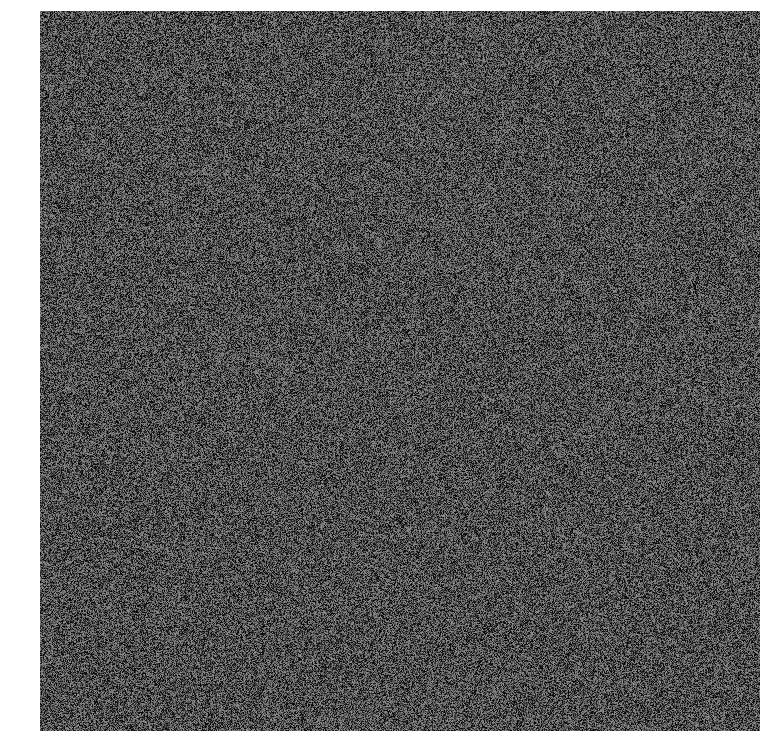

In [98]:
# draw from uniform distribution; clamp dynamic range
imgSize = 2000
minVal = 0.5#0.25
maxVal = 1#0.5


texImg = np.random.uniform(low=minVal, high=maxVal, size=(imgSize, imgSize))
        
fig = plt.figure(frameon=False)
fig.set_size_inches(10,10)
ax = plt.Axes(fig, [0,0,1,1])
ax.set_axis_off()
fig.add_axes(ax)

#fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(texImg, cmap='Greys', vmin=0, vmax=1, interpolation='none')
#ax.axis('off')
#fig.tight_layout()

fig.savefig(pltDir+sep+'whiteNoise_limitedRange_min{}-max{}_{}px.jpg'.format(minVal, maxVal, imgSize),transparent=True)

In [99]:
import scipy.misc
scipy.misc.toimage(1-texImg, cmin=0, cmax=1).save(pltDir+sep+'whiteNoise_limitedRange_min{}-max{}_{}px_directExp.jpg'.format(minVal, maxVal, imgSize))

/Users/haberkernh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


In [102]:
wnjpgDan = imread(pltDir+sep+'whiteNoise_limitedRange_min{}-max{}_{}px_directExp.jpg'.format(minVal, maxVal, imgSize))
wnjpgDan.shape

(2000, 2000)

#### First order stats

0.5121

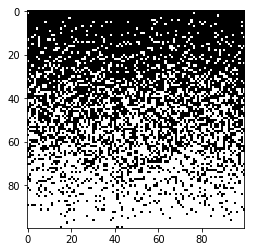

In [4]:
# initialize image
texImg = np.zeros((imgSize,imgSize))

pGamma = 1
# Draw each pixel randomly
for i in range(imgSize):
    for j in range(imgSize):
        texImg[i,j] = np.random.binomial(n=1, p=pGamma)
        
    pGamma = pGamma-1/imgSize
    
plt.imshow(texImg, cmap='Greys', vmin=0, vmax=1)
np.sum(texImg)/np.size(texImg)

#### Second order stats

0.50109999999999999

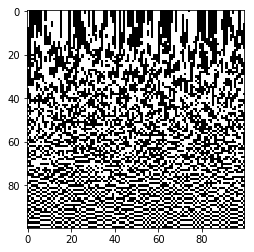

In [5]:
# initialize image
texImg = np.zeros((imgSize,imgSize))

pBeta_1 = 1

# Look at neighboring pixel along *horizontal* direction
for i in range(imgSize):
    for j in range(imgSize):
        
        if not i:
            #initialize first *row* at random:
            texImg[i,j] = np.random.binomial(n=1, p=0.5)
            
        elif texImg[i-1,j]:
            texImg[i,j] = np.random.binomial(n=1, p=pBeta_1)
        else:
            texImg[i,j] = np.random.binomial(n=1, p=1-pBeta_1)
        
    pBeta_1 = pBeta_1 - (1/imgSize)
        
plt.imshow(texImg, cmap='Greys', vmin=0, vmax=1)
np.sum(texImg)/np.size(texImg)

0.5

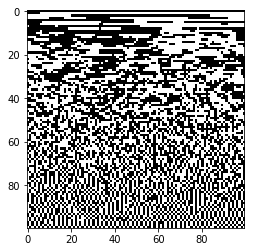

In [201]:
# initialize image
texImg = np.zeros((imgSize,imgSize))

pBeta_2 = 1

# Look at neighboring pixel along *vertical* direction
for i in range(imgSize):
    for j in range(imgSize):
        
        if not j:
            #initialize first *column* at random:
            texImg[i,j] = np.random.binomial(n=1, p=0.5)
            
        elif texImg[i,j-1]:
            texImg[i,j] = np.random.binomial(n=1, p=pBeta_2)
        else:
            texImg[i,j] = np.random.binomial(n=1, p=1-pBeta_2)
    
    pBeta_2 = pBeta_2 - (1/imgSize)
        
plt.imshow(texImg, cmap='Greys', vmin=0, vmax=1)
np.sum(texImg)/np.size(texImg)

0.4909

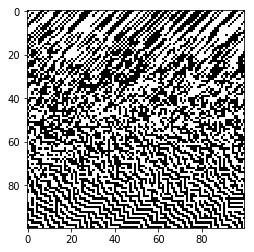

In [202]:
# initialize image
texImg = np.zeros((imgSize,imgSize))

pBeta_3 = 0

# Look at neighboring pixel along *diagonal up* direction
for i in np.arange(imgSize, 0,-1)-1:
    for j in np.arange(imgSize):
        
        if i==(imgSize-1) or not j:
            #initialize first *row* and "column* at random:
            texImg[i,j] = np.random.binomial(n=1, p=0.5)
        
        elif texImg[i+1,j-1]:
            texImg[i,j] = np.random.binomial(n=1, p=pBeta_3)
        else:
            texImg[i,j] = np.random.binomial(n=1, p=1-pBeta_3)
        
    pBeta_3 = pBeta_3 + (1/imgSize)
    
plt.imshow(texImg, cmap='Greys', vmin=0, vmax=1)
np.sum(texImg)/np.size(texImg)

0.4985

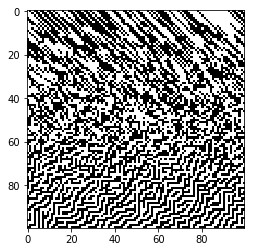

In [203]:
# initialize image
texImg = np.zeros((imgSize,imgSize))

pBeta_4 = 1

# Look at neighboring pixel along *diagonal down* direction
for i in range(imgSize):
    for j in range(imgSize):
        
        if (not i) or (not j):
            #initialize first *row* and *column* at random:
            texImg[i,j] = np.random.binomial(n=1, p=0.5)
            
        elif texImg[i-1,j-1]:
            texImg[i,j] = np.random.binomial(n=1, p=pBeta_4)
        else:
            texImg[i,j] = np.random.binomial(n=1, p=1-pBeta_4)
            
    pBeta_4 = pBeta_4 - (1/imgSize)
        
plt.imshow(texImg, cmap='Greys', vmin=0, vmax=1)
np.sum(texImg)/np.size(texImg)

## Generate stripe texture for VR experiments

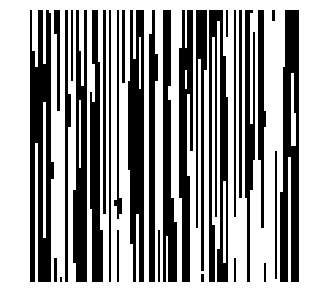

In [43]:
# initialize image
texImg = np.zeros((imgSize,imgSize))

pBeta_1 = 0.99

# Look at neighboring pixel along *horizontal* direction
for i in range(imgSize):
    for j in range(imgSize):
        
        if not i:
            #initialize first *row* at random:
            texImg[i,j] = np.random.binomial(n=1, p=0.5)
            
        elif texImg[i-1,j]:
            texImg[i,j] = np.random.binomial(n=1, p=pBeta_1)
        else:
            texImg[i,j] = np.random.binomial(n=1, p=1-pBeta_1)
            
fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.imshow(texImg, cmap='Greys', vmin=0, vmax=1, interpolation='nearest')
ax.axis('off')

fig.savefig(pltDir+sep+'verticalRandomTexture_2pxWindow_beta'+str(pBeta_1)+'.png')

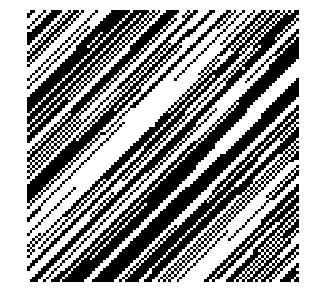

In [45]:
# initialize image
texImg = np.zeros((imgSize,imgSize))

pBeta_3 = 0.99

# Look at neighboring pixel along *diagonal up* direction
for i in np.arange(imgSize, 0,-1)-1:
    for j in np.arange(imgSize):
        
        if i==(imgSize-1) or not j:
            #initialize first *row* and "column* at random:
            texImg[i,j] = np.random.binomial(n=1, p=0.5)
        
        elif texImg[i+1,j-1]:
            texImg[i,j] = np.random.binomial(n=1, p=pBeta_3)
        else:
            texImg[i,j] = np.random.binomial(n=1, p=1-pBeta_3)
        
            
fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.imshow(texImg, cmap='Greys', vmin=0, vmax=1, interpolation='nearest')
ax.axis('off')

fig.savefig(pltDir+sep+'diagonalUpRandomTexture_2pxWindow_beta'+str(pBeta_3)+'.png')

#### Third order stats

### 3 state texture

In [439]:
rootDir = '/Users/haberkernh/Documents/textures/correlationTextures/'

In [440]:
imgSize_x = 500

imgSize_y = 200

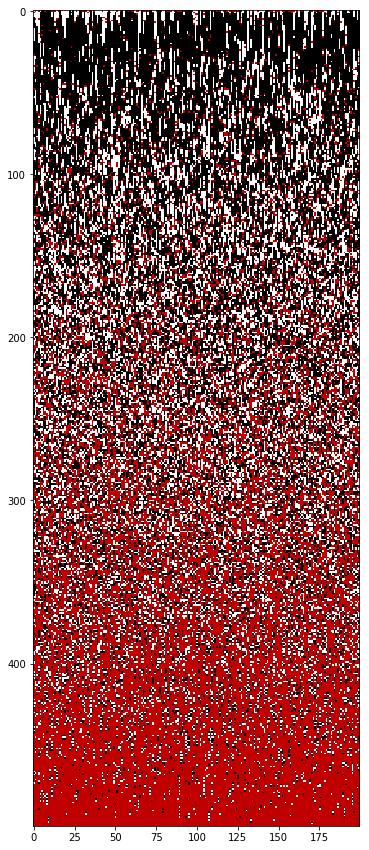

In [441]:
# initialize image
texImg = np.zeros((imgSize_x,imgSize_y))

pBeta_1 = 1

# Look at neighboring pixel along *horizontal* direction
for i in range(imgSize_x):
    for j in range(imgSize_y):
        
        if not i:
            #initialize first *row* at random:
            texImg[i,j] = np.random.randint(low=0, high=3, size=1)
            
        elif texImg[i-1,j]==1:
            if np.random.binomial(n=1, p=1-pBeta_1):
                texImg[i,j] = 1
            else:
                texImg[i,j] = np.random.choice([0,2], 1)
        elif texImg[i-1,j]==2:
            if np.random.binomial(n=1, p=pBeta_1*0.8):
                texImg[i,j] = 2
            else:
                texImg[i,j] = np.random.choice([0,1], 1)
        else:
            if np.random.binomial(n=1, p=pBeta_1):
                texImg[i,j] = 0
            else:
                texImg[i,j] = np.random.choice([1,2], 1)
        
    pBeta_1 = pBeta_1 - (1/imgSize_x)
        

fig, ax = plt.subplots(1,1, figsize=(15,15))    
ax.imshow(texImg, cmap='gist_heat', vmin=0, vmax=2)

imgName = 'verticalCor_narrowLinear_3state_01'

if os.path.isfile(rootDir+imgName+'.png'):
    fig.savefig(rootDir+imgName+'_2.png')
else:
    fig.savefig(rootDir+imgName+'.png')

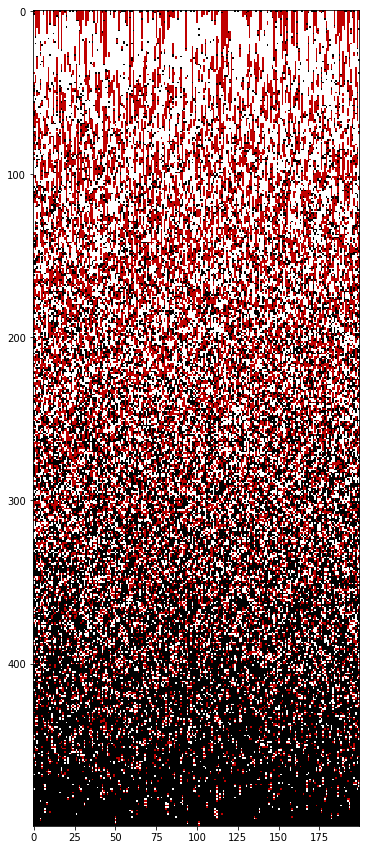

In [442]:
# initialize image
texImg = np.zeros((imgSize_x,imgSize_y))

pBeta_1 = 1

# Look at neighboring pixel along *horizontal* direction
for i in range(imgSize_x):
    for j in range(imgSize_y):
        
        if not i:
            #initialize first *row* at random:
            texImg[i,j] = np.random.randint(low=0, high=3, size=1)
            
        elif texImg[i-1,j]==1:
            if np.random.binomial(n=1, p=pBeta_1*0.9):
                texImg[i,j] = 1
            else:
                texImg[i,j] = np.random.choice([0,2], 1)
        elif texImg[i-1,j]==2:
            if np.random.binomial(n=1, p=pBeta_1):
                texImg[i,j] = 2
            else:
                texImg[i,j] = np.random.choice([0,1], 1)
        else:
            if np.random.binomial(n=1, p=1-pBeta_1):
                texImg[i,j] = 0
            else:
                texImg[i,j] = np.random.choice([1,2], 1)
        
    pBeta_1 = pBeta_1 - (1/imgSize_x)
        

fig, ax = plt.subplots(1,1, figsize=(15,15))    
ax.imshow(texImg, cmap='gist_heat', vmin=0, vmax=2)

imgName = 'verticalCor_narrowLinear_3stateRev_01'

if os.path.isfile(rootDir+imgName+'.png'):
    fig.savefig(rootDir+imgName+'_2.png')
else:
    fig.savefig(rootDir+imgName+'.png')

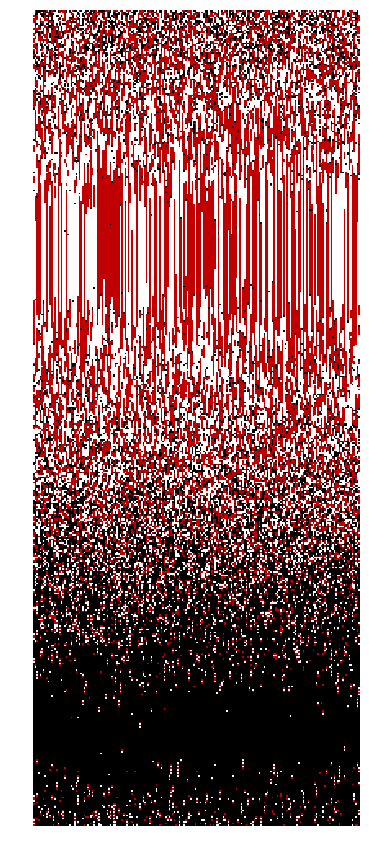

In [443]:
# initialize image
texImg = np.zeros((imgSize_x,imgSize_y))

pBeta_1 = 1

# Look at neighboring pixel along *horizontal* direction
for i in range(imgSize_x):
    for j in range(imgSize_y):
        
        if not i:
            #initialize first *row* at random:
            texImg[i,j] = np.random.randint(low=0, high=3, size=1)
            
        elif texImg[i-1,j]==1:
            if np.random.binomial(n=1, p=pBeta_1):
                texImg[i,j] = 1
            else:
                texImg[i,j] = np.random.choice([0,2], 1)
        elif texImg[i-1,j]==2:
            if np.random.binomial(n=1, p=pBeta_1):
                texImg[i,j] = 2
            else:
                texImg[i,j] = np.random.choice([0,1], 1)
        else:
            if np.random.binomial(n=1, p=1-pBeta_1):
                texImg[i,j] = 0
            else:
                texImg[i,j] = np.random.choice([1,2], 1)
        
    pBeta_1 = ((np.sin((1.7*np.pi*i)/imgSize_x))+1)/2
    

fig, ax = plt.subplots(1,1, figsize=(15,15))    
ax.imshow(texImg, cmap='gist_heat', vmin=0, vmax=2)

ax.axis('off')


imgName = 'verticalCor_narrowSine_3state_01'


if os.path.isfile(rootDir+imgName+'.png'):
    fig.savefig(rootDir+imgName+'_2.png')
else:
    fig.savefig(rootDir+imgName+'.png')

In [460]:
imgSize_x = 500
imgSize_y = 400

postfix='05'

# initialize image
texImg = np.zeros((imgSize_x,imgSize_y))

pBeta_1 = 1

# Look at neighboring pixel along *horizontal* direction
for i in range(imgSize_x):
    for j in range(imgSize_y):
        
        if not i:
            #initialize first *row* at random:
            texImg[i,j] = np.random.randint(low=0, high=3, size=1)
            
        elif texImg[i-1,j]==1:
            if np.random.binomial(n=1, p=pBeta_1):
                texImg[i,j] = 1
            else:
                texImg[i,j] = np.random.choice([0,2], 1)
        elif texImg[i-1,j]==2:
            if np.random.binomial(n=1, p=pBeta_1):
                texImg[i,j] = 2
            else:
                texImg[i,j] = np.random.choice([0,1], 1)
        else:
            if np.random.binomial(n=1, p=1-pBeta_1):
                texImg[i,j] = 0
            else:
                texImg[i,j] = np.random.choice([1,2], 1)
        
    pBeta_1 = ((np.sin((1.7*np.pi*i)/imgSize_x))+1)/2

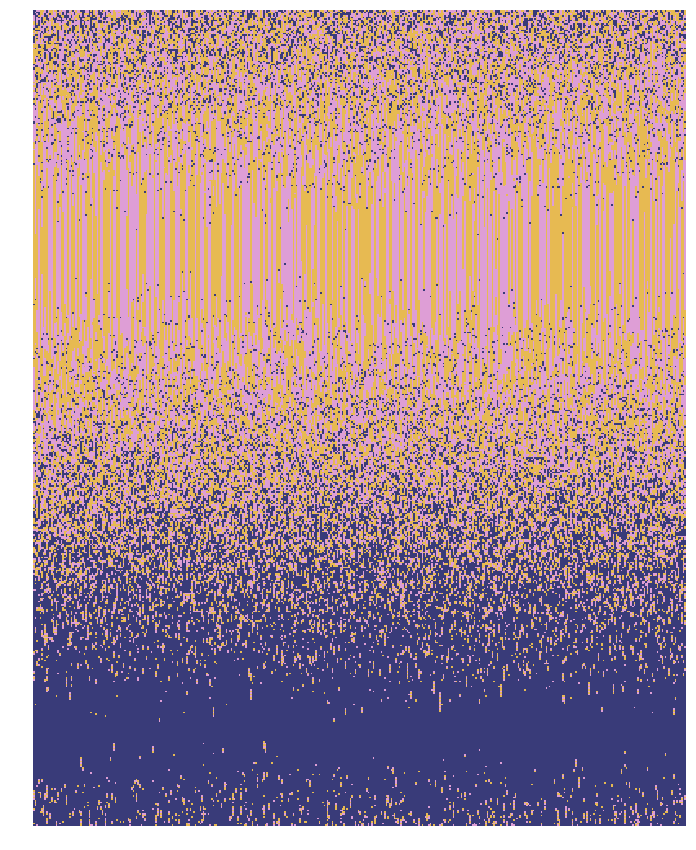

In [461]:
fig, ax = plt.subplots(1,1, figsize=(15,15))    
ax.imshow(texImg, cmap='tab20b', aspect=1, interpolation='none')

ax.axis('off')

imgName = 'verticalCor_neon_'+postfix

if os.path.isfile(rootDir+imgName+'.png'):
    fig.savefig(rootDir+imgName+'_2.png')
else:
    fig.savefig(rootDir+imgName+'.png')

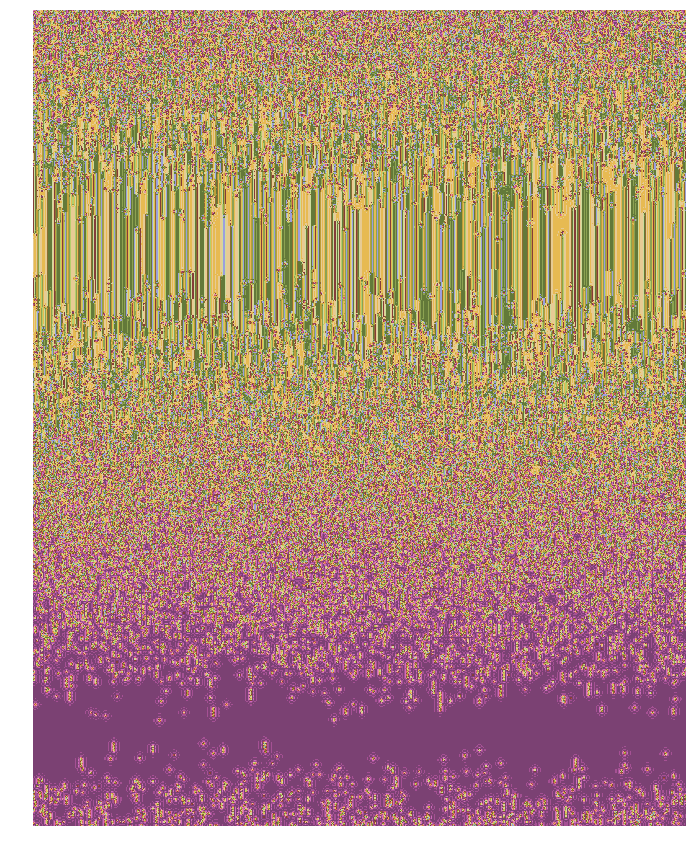

In [462]:
fig, ax = plt.subplots(1,1, figsize=(15,15))    
ax.imshow(texImg, cmap='tab20b_r', vmin=-0.5, vmax=2.8, interpolation='lanczos')

ax.axis('off')

imgName = 'verticalCor_forest_'+postfix

if os.path.isfile(rootDir+imgName+'.png'):
    fig.savefig(rootDir+imgName+'_2.png')
else:
    fig.savefig(rootDir+imgName+'.png')

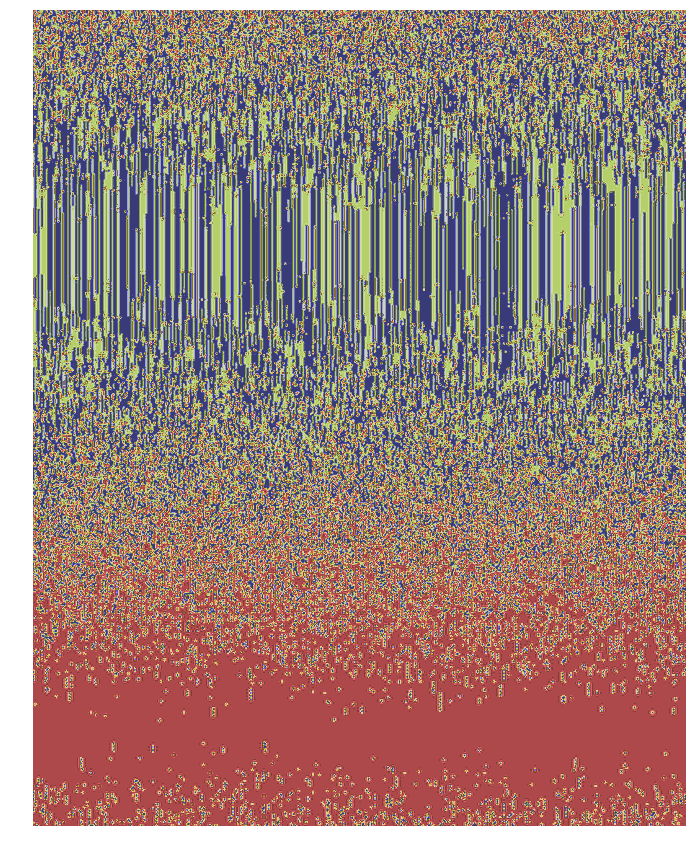

In [463]:
fig, ax = plt.subplots(1,1, figsize=(15,15))    
ax.imshow(texImg, cmap='tab20b_r', vmin=-1, vmax=2, interpolation='lanczos')
ax.axis('off')

imgName = 'verticalCor_dark_'+postfix

if os.path.isfile(rootDir+imgName+'.png'):
    fig.savefig(rootDir+imgName+'_2.png')
else:
    fig.savefig(rootDir+imgName+'.png')

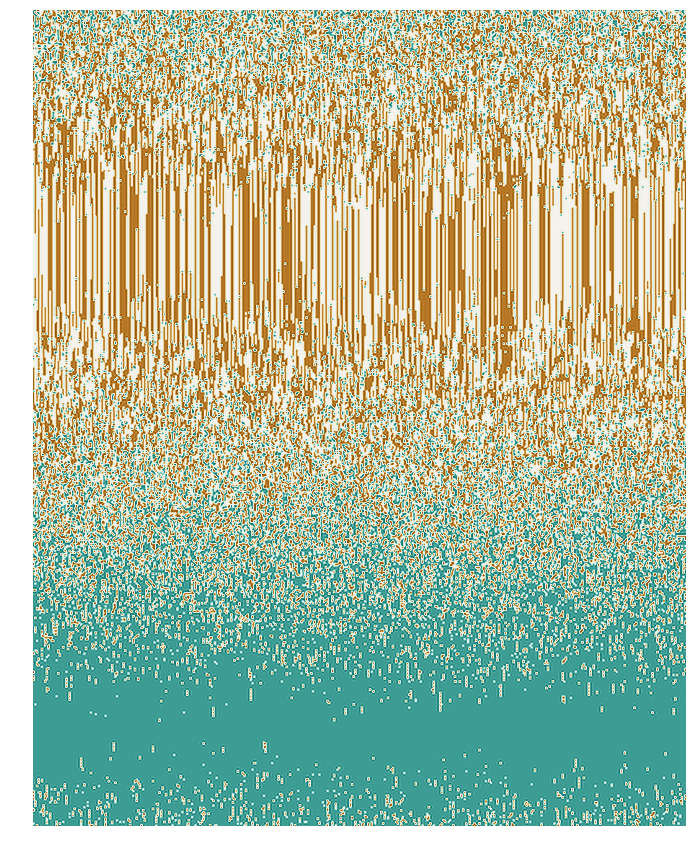

In [464]:
fig, ax = plt.subplots(1,1, figsize=(15,15))    
ax.imshow(texImg, cmap='BrBG_r', vmin=-0.7, vmax=2.6, interpolation='lanczos')
ax.axis('off')

imgName = 'verticalCor_water_'+postfix

if os.path.isfile(rootDir+imgName+'.png'):
    fig.savefig(rootDir+imgName+'_2.png')
else:
    fig.savefig(rootDir+imgName+'.png')